## Introduction

Pokémon is a series of video games and animated TV shows that first aired in 1996, created by Nintendo and Game Freak. The show and games have been highly successful and have received many Game Of The Year awards. The first game of the year award came in 2000, with the release of a their first ever game named 'Pokémon Yellow'. The Pokémon games have since been highly rated amongst the gaming community.

The world of Pokémon is a fantasy world based on monsters that people, known as ***Pokémon Trainers***, catch with special devices called ***Pokeballs***. Till this date they have been eight generation of Pokémon games and a total of 905 unique Pokémon’s across all generations. The first generation introduced 150 Pokémon’s with 4 special Pokémon’s called **Legendary Pokémon**. Now we have a total of 82 Legendary Pokémon.


## What makes a Pokemon Legendary?

A Legendary Pokémon is a special type of Pokémon that is very rare and extremely powerful. In the world of Pokémon, they are considered as myths or legends. The stats of a Legendary Pokémon differ vastly from a normal Pokémon, as they have Higher Attack, Defense, Speed, Special Attack and Special Defense then normal Pokémon.

So, in this pipeline we will looking at all these stats and using them to predict if a Pokémon is Legendary or Not.

#### The Legendary Dataset

This dataset contains information on all 802 Pokémon from all Seven Generations of Pokémon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/

#### Contents of the Dataset

##### 1 - Name: The English name of the Pokemon
##### 2 - Japanese Name: The Original Japanese name of the Pokemon
##### 3 - Pokedex Number: The entry number of the Pokemon in the National Pokedex
##### 4 - Percentage male: The percentage of the species that are male. Blank if the Pokemon is genderless.
##### 5 - Type1: The Primary Type of the Pokemon
##### 6 - Type2: The Secondary Type of the Pokemon
##### 7 - Classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
##### 8 - Height (m): Height of the Pokemon in metres
##### 9 - Weight (kg): The Weight of the Pokemon in kilograms
##### 10 - Capture Rate: Capture Rate of the Pokemon
##### 11 - Base Egg Steps: The number of steps required to hatch an egg of the Pokemon
##### 12 - Abilities: A stringified list of abilities that the Pokemon is capable of having
##### 13 - Experience Growth: The Experience Growth of the Pokemon
##### 14 - Base Happiness: Base Happiness of the Pokemon 
##### 15 - Against: Eighteen features that denote the amount of damage taken against an attack of a particular type
##### 16 - HP: The Base HP (Health) of the Pokemon
##### 17 - Attack: The Base Attack of the Pokemon
##### 18 - Defense: The Base Defense of the Pokemon
##### 19 - SP Attack: The Base Special Attack of the Pokemon
##### 20 - SP Defense: The Base Special Defense of the Pokemon
##### 21 - Speed: The Base Speed of the Pokemon
##### 22 - Generation: The numbered generation which the Pokemon was first introduced
##### 21 - Is Legendary: Denotes if the Pokemon is legendary.

### Overview of the Pipeline

In this pipeline we will be going through many different Machine Learning stages, starting from Data Collection, then we will move on to the Data Exploration stage. 
After Data Exploration we will seeing the Data Preprocessing stage, where we will clean our datasets of any missing values, outliers or any other value that might alter the efficiency of our Machine Learning Model. 
Then we will move onto the Feature Engineering and then Training and Testing the model, for this pipeline we are using three Machine Learning Models, namely, ***Support Vector Machine, Decision Tree Classifier and K Nearest Neighbors***. Then we will conclude this pipeline by analyzing the results by these three models and pick out the best model based on metric score.


But the most crucial stage for any pipeline is the importing libraries stage, as without them there is no code. So, for this pipeline we will be working with, ***Pandas, Scikit-Learn, Matplotlib and Seaborn*** libraries. So, let’s start by,

## Importing libraries


In [1]:
import pandas                as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.decomposition   import PCA
from imblearn.over_sampling  import SMOTE
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

import seaborn               as sns
import matplotlib.pyplot     as plt

Now that libraries have been imported, now we can use Panda’s library to import the Dataset we will be working on,

## Loading Dataset


In [2]:
df = pd.read_csv('pokemon.csv')
dfpop = df.pop('name')
df.insert(0,'name', value = dfpop)
df = df.set_index('pokedex_number')
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,japanese_name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,Fushigidaneフシギダネ,88.1,65,65,45,grass,poison,6.9,1,0
2,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,Fushigisouフシギソウ,88.1,80,80,60,grass,poison,13.0,1,0
3,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,Fushigibanaフシギバナ,88.1,122,120,80,grass,poison,100.0,1,0
4,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,Hitokageヒトカゲ,88.1,60,50,65,fire,NaN,8.5,1,0
5,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,Lizardoリザード,88.1,80,65,80,fire,NaN,19.0,1,0


# Data Exploration

Now that we have uploaded the Dataset, let’s have some fun with it. Let’s use it to find some interesting insights.

In [3]:
sns.set_style('darkgrid');
sns.set_context(context='paper', font_scale=1.2);

#### Listing the names of all Legendary Pokemon and their stats:

In [4]:
pd.options.display.max_rows = 70
df[(df['is_legendary'] == 1)]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,japanese_name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
144,Articuno,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.00,1.00,1.00,2.00,1.0,...,Freezerフリーザー,NaN,95,125,85,ice,flying,55.4,1,1
145,Zapdos,"['Pressure', 'Static']",0.50,1.0,1.0,1.00,1.00,0.50,1.00,0.5,...,Thunderサンダー,NaN,125,90,100,electric,flying,52.6,1,1
146,Moltres,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.00,0.50,0.50,0.50,1.0,...,Fireファイヤー,NaN,125,85,90,fire,flying,60.0,1,1
150,Mewtwo,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,...,Mewtwoミュウツー,NaN,194,120,140,psychic,NaN,122.0,1,1
151,Mew,['Synchronize'],2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,...,Mewミュウ,NaN,100,100,100,psychic,NaN,4.0,1,1
243,Raikou,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,0.50,1.00,1.00,1.00,0.5,...,Raikouライコウ,NaN,115,100,115,electric,NaN,178.0,2,1
244,Entei,"['Pressure', 'Inner Focus']",0.50,1.0,1.0,1.00,0.50,1.00,0.50,1.0,...,Enteiエンテイ,NaN,90,75,100,fire,NaN,198.0,2,1
245,Suicune,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,2.00,1.00,1.00,0.50,1.0,...,Suicuneスイクン,NaN,90,115,85,water,NaN,187.0,2,1
249,Lugia,"['Pressure', 'Multiscale']",1.00,2.0,1.0,2.00,1.00,0.25,1.00,1.0,...,Lugiaルギア,NaN,90,154,110,psychic,flying,216.0,2,1


#### Proving the rarity of Legendary Pokemon

<AxesSubplot:xlabel='generation', ylabel='count'>

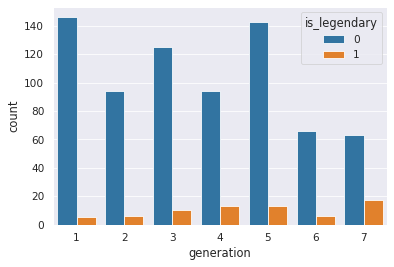

In [5]:
sns.countplot(x= df.generation, hue= df.is_legendary) 

The plot shows the generation on x-axis and the number of Pokemon in each Generation. From this we can see for ourselves the rarity of Legendary Pokémon.

#### Comparision of Stats of Legendary and Non-Legendary Pokemon

Let's start the comparsion by seperating Legendary and Non-Legendary Pokemon,

In [6]:
legend = pd.DataFrame(df[(df['is_legendary']==1)])
nonleg = pd.DataFrame(df[(df['is_legendary']==0)])


Once seperated, we can now select the stats columns of both dataframes, take each of their mean values and save it in a varible.

In [7]:
legmean = pd.DataFrame(legend[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean(axis=0))
nlegmean = pd.DataFrame(nonleg[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean(axis=0))
legmean = legmean.T 
nlegmean = nlegmean.T

Now we concatenate both the dataframes into one dataframe, with a new column that denotes which row is legendary,

In [8]:
df4 = pd.concat([legmean, nlegmean], axis=0, ignore_index=False)
df4['col'] = (len(legmean)*(0,) + len(nlegmean)*(1,))
species = ['Legendary', 'Non-Legendary']
df4['species'] = species

Now we can start plotting the stats,

##### Difference in Health stats of both species,

<AxesSubplot:xlabel='species', ylabel='hp'>

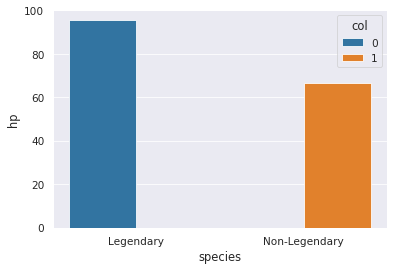

In [9]:
sns.barplot(x='species', y='hp', hue='col', data=df4)


##### Difference in Attack stats of both species,

<AxesSubplot:xlabel='species', ylabel='attack'>

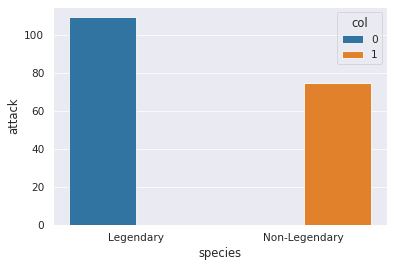

In [10]:
sns.barplot(x='species', y='attack', hue='col', data=df4)


##### Difference in Defense stats of both species,

<AxesSubplot:xlabel='species', ylabel='defense'>

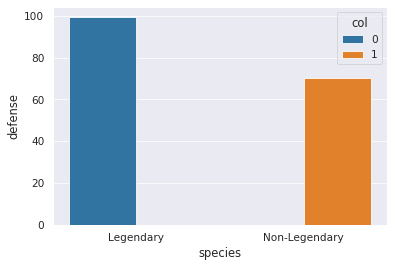

In [11]:
sns.barplot(x='species', y='defense', hue='col', data=df4)


##### Difference in Special Attack stats of both species,

<AxesSubplot:xlabel='species', ylabel='sp_attack'>

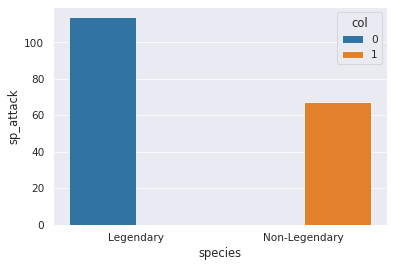

In [12]:
sns.barplot(x='species', y='sp_attack', hue='col', data=df4)


##### Difference in Special Defense stat of both species,

<AxesSubplot:xlabel='species', ylabel='sp_defense'>

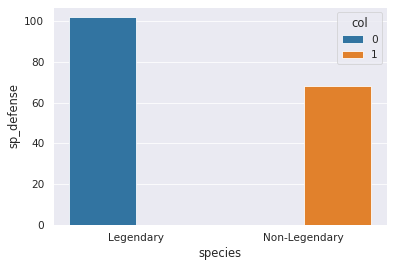

In [13]:
sns.barplot(x='species', y='sp_defense', hue='col', data=df4)


##### Difference in Speed stat of both species,

<AxesSubplot:xlabel='species', ylabel='speed'>

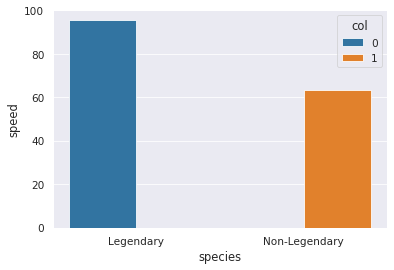

In [14]:
sns.barplot(x='species', y='speed', hue='col', data=df4)


Looking at all these stats, we can prove the vast difference in Offense, Defense and Speed statistics of both types of Pokemon.
With the Legendary Pokemon being in the league of their own.

# Data Preprocessing

## Data Cleaning

To remove unwanted column, viewing all column names:

In [15]:
df.columns 

Index(['name', 'abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'percentage_male', 'sp_attack', 'sp_defense', 'speed',
       'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Dropping the unwanted columns such as all the *against columns, height, weight and percentage male columns* as they do not contribute towards a Pokémon being **Legendary**.

In [16]:
df = df.drop(['against_bug', 'against_dark', 'against_dragon','height_m',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'percentage_male','type2', 'weight_kg', ], axis = 1)

Now we will split the dataset into two sub datasets, namely, **df_train** and **df_test**. This done before the data cleaning stage to make sure that during the cleaning phase, the test data is not exposed to the training set, to avoid over fitting of the model.

In [17]:
df_train, df_test = train_test_split(df)
print(df_train.shape, df_test.shape)

(600, 18) (201, 18)


Now we will look for the missing data in the **df_train** and **df_test** and see if we can make do with removing them or should we apply a different approach to clean data.


In [18]:
print('Null values in Training Set: \n', df_train.isna().sum())
print('\n')
print('Null values in the Testing Set: \n', df_test.isna().sum())

Null values in Training Set: 
 name                 0
abilities            0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
hp                   0
japanese_name        0
sp_attack            0
sp_defense           0
speed                0
type1                0
generation           0
is_legendary         0
dtype: int64


Null values in the Testing Set: 
 name                 0
abilities            0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
hp                   0
japanese_name        0
sp_attack            0
sp_defense           0
speed                0
type1                0
generation           0
is_legendary         0
dtype: int64


From above we can see that there are no null values in both the sub datasets. So now we will move on to look at the data types of the features.  

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 255 to 643
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               600 non-null    object
 1   abilities          600 non-null    object
 2   attack             600 non-null    int64 
 3   base_egg_steps     600 non-null    int64 
 4   base_happiness     600 non-null    int64 
 5   base_total         600 non-null    int64 
 6   capture_rate       600 non-null    object
 7   classfication      600 non-null    object
 8   defense            600 non-null    int64 
 9   experience_growth  600 non-null    int64 
 10  hp                 600 non-null    int64 
 11  japanese_name      600 non-null    object
 12  sp_attack          600 non-null    int64 
 13  sp_defense         600 non-null    int64 
 14  speed              600 non-null    int64 
 15  type1              600 non-null    object
 16  generation         600 non-null    int64 


Looking at the data types we can see that we have two types, **int64** and **object**, we can work with int64 but we need to tranform the object because the Machine Learning model can not read strings as attributes. So we will enocde categorical attributes, to make it readable, in the feature engineering phase of this pipeline.

# Feature Engineering

The first step into feature engineering is to select your features and target label. Since, we are wroking to find the Legendary status of Pokemon's based on their stats, we will select the column **is_Legendary** as our target variable and the other columns will the features that will be used to predict that.

### Seperating Features and Target Variable


In [20]:
x_train = df_train.drop(['is_legendary'], axis = 1)
y_train = df_train['is_legendary']

x_test = df_test.drop(['is_legendary'], axis = 1)
y_test = df_test['is_legendary']

print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

x_test: (201, 17)
y_test: (201,)
x_train: (600, 17)
y_train: (600,)


Now that we are done with seperating Target Variable from the Features, we can move on to assigning categorical attributes to the features. For this we will use **OneHotEncoder()** from the ***preprocessing*** library of Scikit-Learn and transfrom both the sub datasets.

### Encoding categorical attributes

In [21]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(x_train)
x_train = ohe.transform(x_train)
x_test = ohe.transform(x_test)
print('x_test:', x_test.shape)
print('x_train:', x_train.shape)

x_test: (201, 2919)
x_train: (600, 2919)


The next step in feature engineering is to standardize the sub datasets. For this we will use **StandardScaler()** from the ***preprocesing*** library of Scikit-Learn.

### Standardizing the sub datasets


In [22]:
stand = StandardScaler(with_mean = False)
stand.fit(x_train)
x_train = stand.transform(x_train)
x_test = stand.transform(x_test)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train: (600, 2919)
x_test: (201, 2919)


The third step in feature engineering phase of this pipeline we will look at the domensionality reduction to remove the less important variable from the data, this will reduce the complexity of the model and also curb any overfitting of the model.

For this we will use **PCA** from the ***decomposition*** library of Scikit-Learn.

### Dimensionality Reduction

In [23]:
dimred = PCA(n_components = 100)
dimred.fit(x_train.toarray())
x_train = dimred.transform(x_train.toarray())
x_test = dimred.transform(x_test.toarray())
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train: (600, 100)
x_test: (201, 100)


The last step in the feature engineering phase is to balance the datasets. Balancing is done to make sure that we do not have any imbalance classes that can lead to underfitting or over fitting of the model.

#### Balancing the data


In [24]:
osam = SMOTE()
x_train, y_train = osam.fit_resample(x_train, y_train)
print(x_train.shape, y_train.shape)

(1092, 100) (1092,)


Once we are done with balancing the data, we can move on from feature engineering to training Machine Learning Models.

# Model Training & Testing

Looking at the dataset, we can see that it consists of discrete variable, so we will be going with classification models.
The 3 models we have choosen are for training are ***Support Vector Machine, Decision Tree Classifier and KN Neighbors Models***.

Through out this pipeline we will be using **GridSearchCV()** library from Scikit-Learn to find the best barameters for the said model and then find the ***F1 Score, Confusion Matrix, Precision, Recall and Accuracy*** to interpret the efficiency of the models.

### Support Vector Machine Model

Training an Support Vector Machine Model and fiding the best hyper-parameters using GridSearchCV from Scikit-Learn.
Here, we will be defining a dictionary of parameters for the SVM Model, the two main hyper-parameters for svm are ***C and Kernel***.

In [25]:
svm = SVC()
param = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'rbf']
}
gs_svm = GridSearchCV(svm, param_grid = param, cv =5)
gs_svm.fit(x_train, y_train)
gs_svm.cv_results_
gsdf_svm = pd.DataFrame(gs_svm.cv_results_)
gsdf_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014823,0.008004,0.004363,0.004858,1,linear,"{'C': 1, 'kernel': 'linear'}",0.990868,0.986301,0.995413,0.958716,0.986239,0.983507,0.012852,5
1,0.016098,0.000378,0.005195,0.000200,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.990868,0.995434,0.995413,0.990826,1.000000,0.994508,0.003425,4
2,0.007009,0.000702,0.000812,0.000036,10,linear,"{'C': 10, 'kernel': 'linear'}",0.990868,0.986301,0.995413,0.958716,0.986239,0.983507,0.012852,5
3,0.014485,0.000495,0.004360,0.000220,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.990868,0.995434,1.000000,0.990826,1.000000,0.995425,0.004094,1
4,0.007004,0.000709,0.000804,0.000044,100,linear,"{'C': 100, 'kernel': 'linear'}",0.990868,0.986301,0.995413,0.958716,0.986239,0.983507,0.012852,5
5,0.014463,0.000643,0.004252,0.000127,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.990868,0.990868,1.000000,0.990826,1.000000,0.994512,0.004481,2
6,0.007054,0.000702,0.000804,0.000041,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.990868,0.986301,0.995413,0.958716,0.986239,0.983507,0.012852,5
7,0.014465,0.000652,0.004282,0.000179,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.990868,0.990868,1.000000,0.990826,1.000000,0.994512,0.004481,2


After training the model, we find the best parameters and the score of that parameters. In this case,

In [26]:
print("\n The best score across ALL searched params:\n",gs_svm.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_svm.best_params_)



 The best score across ALL searched params:
 0.9954254115872816

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}


Now that we have the best parameters for SVM Model, we can test it find the scores.

##### Testing the model and checking metric score: 


                                 0
Model      Support Vector Machines
F1 Score                  0.896552
Accuracy                  0.985075
Precision                      1.0
Recall                      0.8125


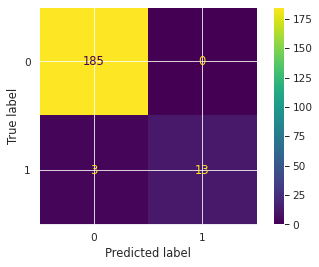

In [27]:
y_pred_svm = gs_svm.best_estimator_.predict(x_test)
cfx_svm = confusion_matrix(y_test, y_pred_svm)
f1_svm =  f1_score(y_test, y_pred_svm)
accu_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
s_svm = pd.Series({'Model': 'Support Vector Machines', 
               'F1 Score': f1_svm, 
               'Accuracy': accu_svm,
               'Precision': prec_svm,
               'Recall' : rec_svm})
s_svm = pd.DataFrame(s_svm)
print(s_svm)

ConfusionMatrixDisplay(cfx_svm).plot()

From the above values we can tell that our model has been trained with a ***F1 score of 89.65%, Accuracy of 98.51%, Precision of 100% and Recall of 81.13%***. Now we will move to another model: 

### Decision Tree Classifier

Training a Decision Tree Classifier Model and fiding the best hyper-parameters using GridSearchCV from Scikit-Learn. Here, we will be defining a dictionary of parameters for the DTC Model, the hyper-parameters for DTC are ***Criterion, splitter and max_depth***.

In [28]:
dtc = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 100, 1000, 2000, 5000, 10000, 20000]
}
gs_dtc = GridSearchCV(dtc, param_grid = params ,cv = 5)
fit = gs_dtc.fit(x_train, y_train)
gsdf_dtc = pd.DataFrame(gs_dtc.cv_results_)
gsdf_dtc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033703,0.004935,0.000352,0.000023,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.972603,0.995434,0.986239,0.977064,0.986239,0.983516,0.007970,23
1,0.002894,0.000363,0.000341,0.000003,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",0.990868,0.986301,0.986239,0.972477,0.986239,0.984425,0.006235,20
2,0.033522,0.004951,0.000343,0.000004,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.968037,1.000000,0.986239,0.972477,0.995413,0.984433,0.012473,17
3,0.003265,0.000485,0.000335,0.000002,gini,100,random,"{'criterion': 'gini', 'max_depth': 100, 'split...",0.977169,0.990868,0.977064,0.990826,0.995413,0.986268,0.007656,13
4,0.033519,0.004968,0.000336,0.000002,gini,1000,best,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.968037,1.000000,0.986239,0.977064,1.000000,0.986268,0.012603,13
5,0.002947,0.000464,0.000335,0.000003,gini,1000,random,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",0.990868,0.990868,0.981651,0.981651,0.995413,0.988090,0.005513,11
6,0.033551,0.004952,0.000338,0.000002,gini,2000,best,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.963470,0.995434,0.986239,0.972477,0.995413,0.982607,0.012732,25
7,0.002466,0.000285,0.000332,0.000002,gini,2000,random,"{'criterion': 'gini', 'max_depth': 2000, 'spli...",0.990868,0.981735,0.986239,0.963303,0.986239,0.981677,0.009630,27
8,0.033539,0.004942,0.000338,0.000003,gini,5000,best,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.977169,0.995434,0.986239,0.972477,1.000000,0.986264,0.010446,15
9,0.002988,0.000289,0.000335,0.000001,gini,5000,random,"{'criterion': 'gini', 'max_depth': 5000, 'spli...",0.958904,0.986301,1.000000,0.986239,0.986239,0.983537,0.013417,21


After training the model, we find the best parameters and the score of that parameters. In this case,

In [29]:
print("\n The best score across ALL searched params:\n",gs_dtc.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_dtc.best_params_)



 The best score across ALL searched params:
 0.9917640651836959

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 10000, 'splitter': 'best'}


Now that we have the best parameters we can move on to train the model and check the efficiency of it,

##### Testing the model and checking metric score: 


                                 0
Model      Decision Tree Classifer
F1 Score                  0.903226
Accuracy                  0.985075
Precision                 0.933333
Recall                       0.875


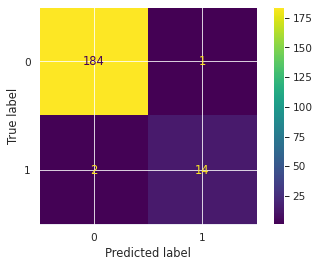

In [30]:
y_pred_dtc = gs_dtc.best_estimator_.predict(x_test)
cfx_dtc = confusion_matrix(y_test, y_pred_dtc)
f1_dtc =  f1_score(y_test, y_pred_dtc)
accu_dtc = accuracy_score(y_test, y_pred_dtc)
prec_dtc = precision_score(y_test, y_pred_dtc)
rec_dtc = recall_score(y_test, y_pred_dtc)
s_dtc = pd.Series({'Model': 'Decision Tree Classifer', 
               'F1 Score': f1_dtc, 
               'Accuracy': accu_dtc,
               'Precision': prec_dtc,
               'Recall' : rec_dtc})
s_dtc = pd.DataFrame(s_dtc)
print(s_dtc)
ConfusionMatrixDisplay(cfx_dtc).plot()

From the above values we can tell that our model has been trained with a ***F1 score of 90.32%, Accuracy of 98.50%, Precision of 93.33% and Recall of 87.5%***.
Now we will move onto our last model: 

### K Nearest Neighbors

Training a K Nearest Neighbors Model and fiding the best hyper-parameters using GridSearchCV from Scikit-Learn. Here, we will be defining a dictionary of parameters for the KNN Model, the hyper-parameters for KNN are ***N Neighbors, Weights and Metrics***

In [31]:
KNN = KNeighborsClassifier()
params_knn= {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean', 'minkowski']
}
gs_knn = GridSearchCV(KNN, param_grid = params_knn, cv=5)
gs_knn.fit(x_train, y_train)
gsdf_knn = pd.DataFrame(gs_knn.cv_results_)
gsdf_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000764,0.000128,0.023483,0.000244,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.986301,0.995434,0.990826,0.986239,0.990826,0.989925,0.003426,5
1,0.000677,0.000002,0.017655,0.000056,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.986301,0.995434,0.990826,0.986239,0.990826,0.989925,0.003426,5
2,0.000674,0.000002,0.024378,0.000022,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.986301,0.995434,0.981651,0.967890,0.981651,0.982586,0.008906,11
3,0.000665,0.000002,0.018741,0.000362,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.986301,0.995434,0.981651,0.967890,0.981651,0.982586,0.008906,11
4,0.000675,0.000009,0.024721,0.000598,manhattan,5,uniform,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.981735,0.986301,0.981651,0.963303,0.981651,0.978928,0.008015,17
5,0.000670,0.000003,0.019041,0.000530,manhattan,5,distance,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.981735,0.986301,0.981651,0.963303,0.981651,0.978928,0.008015,17
6,0.000679,0.000008,0.024895,0.000674,manhattan,7,uniform,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.972603,0.986301,0.981651,0.963303,0.977064,0.976184,0.007897,19
7,0.000677,0.000004,0.019120,0.000501,manhattan,7,distance,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei...",0.972603,0.986301,0.981651,0.963303,0.977064,0.976184,0.007897,19
8,0.000672,0.000005,0.024862,0.000583,manhattan,9,uniform,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.972603,0.981735,0.981651,0.963303,0.977064,0.975271,0.006871,25
9,0.000671,0.000004,0.019171,0.000758,manhattan,9,distance,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei...",0.972603,0.981735,0.981651,0.963303,0.977064,0.975271,0.006871,25


After training the model, we find the best parameters and the score of that parameters. In this case,

In [32]:
print("\n The best score across ALL searched params:\n",gs_knn.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_knn.best_params_)


 The best score across ALL searched params:
 0.9908382556239788

 The best parameters across ALL searched params:
 {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


Now that we have the best parameters we can move on to train the model and check the efficiency of it,

##### Testing the model and checking metric score: 


                             0
Model      K Nearest Neighbors
F1 Score              0.933333
Accuracy               0.99005
Precision                  1.0
Recall                   0.875


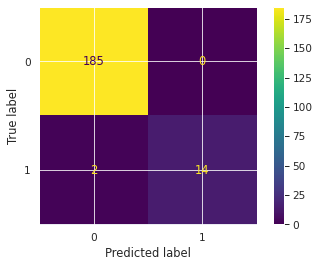

In [33]:
y_pred_knn = gs_knn.best_estimator_.predict(x_test)
cfx_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn =  f1_score(y_test, y_pred_knn)
accu_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
s_knn = pd.Series({'Model': 'K Nearest Neighbors', 
               'F1 Score': f1_knn, 
               'Accuracy': accu_knn,
               'Precision': prec_knn,
               'Recall' : rec_knn})
s_knn = pd.DataFrame(s_knn)
print(s_knn)

ConfusionMatrixDisplay(cfx_knn).plot()

From the above values we can tell that our model has been trained with a ***F1 score of 93.33%, Accuracy of 99.01%, Precision of 100% and Recall of 87.5%***.

# Conclusion

### Perfromance Analysis of Models

Now that we have Trained and Tested all of our models and calculated all the necessary metric score for each of them, we can move to analyze the results.

In [34]:
score = pd.concat([s_svm, s_dtc, s_knn], axis=1, ignore_index=True)
score

,0,1,2
Model,Support Vector Machines,Decision Tree Classifer,K Nearest Neighbors
F1 Score,0.896552,0.903226,0.933333
Accuracy,0.985075,0.985075,0.99005
Precision,1.0,0.933333,1.0
Recall,0.8125,0.875,0.875


Combining all the results in a single Data Frame we can see that **K Nearest Neighbors** is, relatively, the more efficient model in predicting the legendary status from the Pokemon Dataset.

# Reference

https://www.kaggle.com/datasets/rounakbanik/pokemon